In [34]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from acquire import *
from prepare import *

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
y = np.arange(-50, 51)

In [3]:
p = 1 / (1 + np.e ** (-1 * y))

In [4]:
df = pd.DataFrame(dict(y=y, p=p))

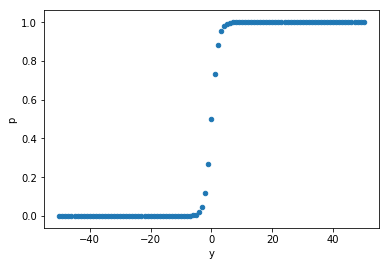

In [6]:
df.plot.scatter(x='y', y='p')

In [7]:
df = prep_titanic(get_titanic_data())

In [8]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [10]:
df.dropna(inplace=True)

In [12]:
train, test = train_test_split(df)

In [16]:
scaler = MinMaxScaler()
scaler.fit(train[['age', 'fare']])

train[['age', 'fare']] = scaler.transform(train[['age', 'fare']])
test[['age', 'fare']] = scaler.transform(test[['age', 'fare']])

In [18]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
408,408,0,3,male,0.279696,0,0,0.015176,S,Third,Southampton,1,3
683,683,0,3,male,0.184561,5,2,0.091543,S,Third,Southampton,0,3
79,79,1,3,female,0.402011,0,0,0.024350,S,Third,Southampton,1,3
715,715,0,3,male,0.252514,0,0,0.014932,S,Third,Southampton,1,3
404,404,0,3,female,0.266105,0,0,0.016908,S,Third,Southampton,1,3


In [20]:
logit = LogisticRegression()

logit.fit(train[['pclass','age','fare','sibsp','parch']], train.survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
logit.predict(train[['pclass','age','fare','sibsp','parch']])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [22]:
logit.predict_proba(train[['pclass','age','fare','sibsp','parch']])

array([[0.75838235, 0.24161765],
       [0.7447    , 0.2553    ],
       [0.80504822, 0.19495178],
       ...,
       [0.65930074, 0.34069926],
       [0.80104011, 0.19895989],
       [0.75832516, 0.24167484]])

In [23]:
train['prediction'] = logit.predict(train[['pclass','age','fare','sibsp','parch']])

In [26]:
(train.survived == train.prediction).sum() / train.shape[0]

0.7177570093457943

In [27]:
logit.score(train[['pclass','age','fare','sibsp','parch']], train.survived)

0.7177570093457943

In [40]:
co_m = confusion_matrix(train.survived, train.prediction).transpose()
print(co_m)

[[287 109]
 [ 42  97]]


In [38]:
print(f'Recall = {(co_m[0] / (co_m[0] + co_m[1]))}')

Recall = [0.72474747 0.30215827]


In [36]:
print(classification_report(train.survived, train.prediction))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       329
           1       0.70      0.47      0.56       206

   micro avg       0.72      0.72      0.72       535
   macro avg       0.71      0.67      0.68       535
weighted avg       0.71      0.72      0.70       535

